In [1]:
import os

In [2]:
os.chdir("../")

In [3]:
from prompt_classifier.datasets import load_datasets
from prompt_classifier.plots import plot_common_words, plot_word_count


c:\Users\riso\miniconda3\envs\prompt-validation\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
law_df, finance_df, healthcare_df, general_df = load_datasets()

In [5]:
def extract_user_content(messages: list) -> str:
    user_content = [msg["content"] for msg in messages if msg["role"] == "user"]
    return ' '.join(user_content)

In [6]:
finance_df['prompt'] = finance_df['messages'].apply(extract_user_content)

In [7]:
finance_df['label'] = True
finance_df = finance_df.head(20000)
finance_df[['prompt', 'label']].to_csv('data/processed/finance_prompts.csv', index=False, sep=';')

In [8]:
general_df['label'] = False
general_df = general_df.head(20000)
general_df[['prompt', 'label']].to_csv('data/processed/general_promps.csv', index=False, sep=';')

In [9]:
healthcare_df['label'] = True
healthcare_df = healthcare_df.head(20000)
healthcare_df[['input', 'label']].to_csv('data/processed/healthcare_prompts.csv', index=False, sep=';')

In [10]:
law_df['label'] = True
law_df = law_df.head(20000)
law_df[['prompt', 'label']].to_csv('data/processed/law_prompts.csv', index=False, sep=';')

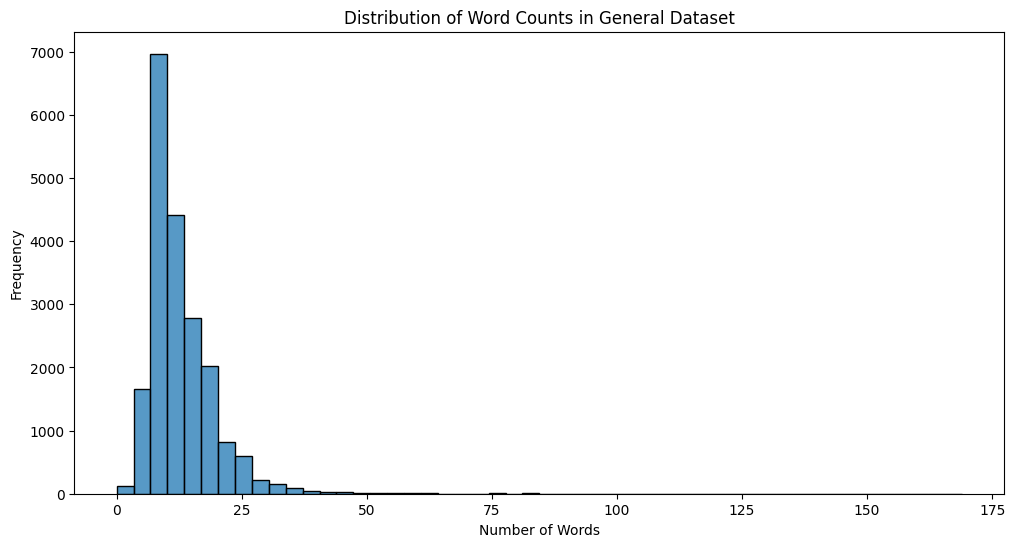

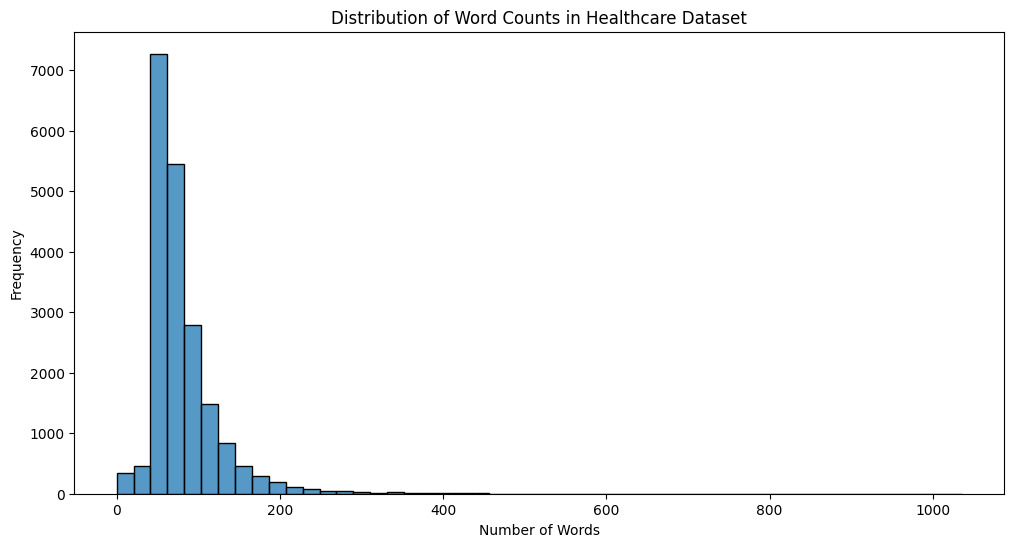

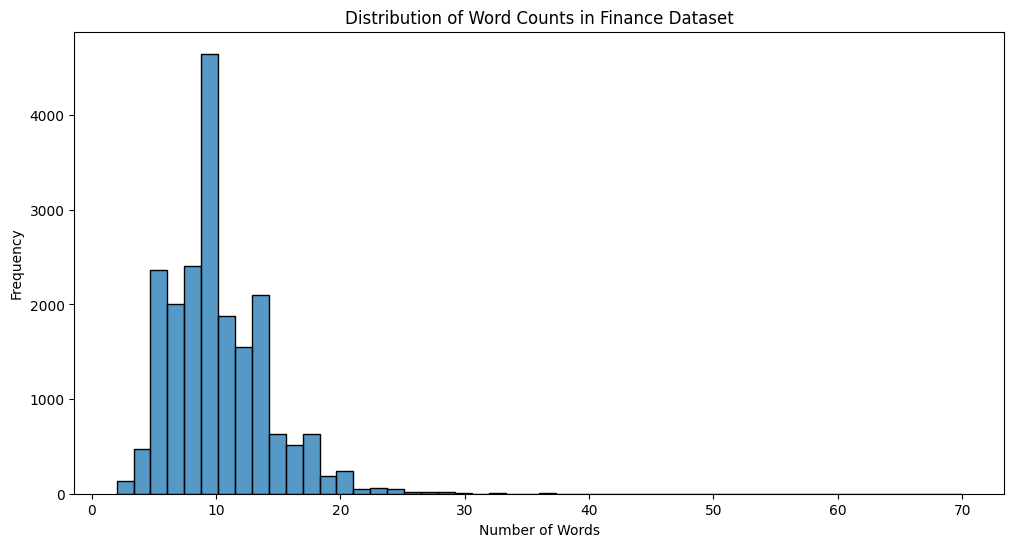

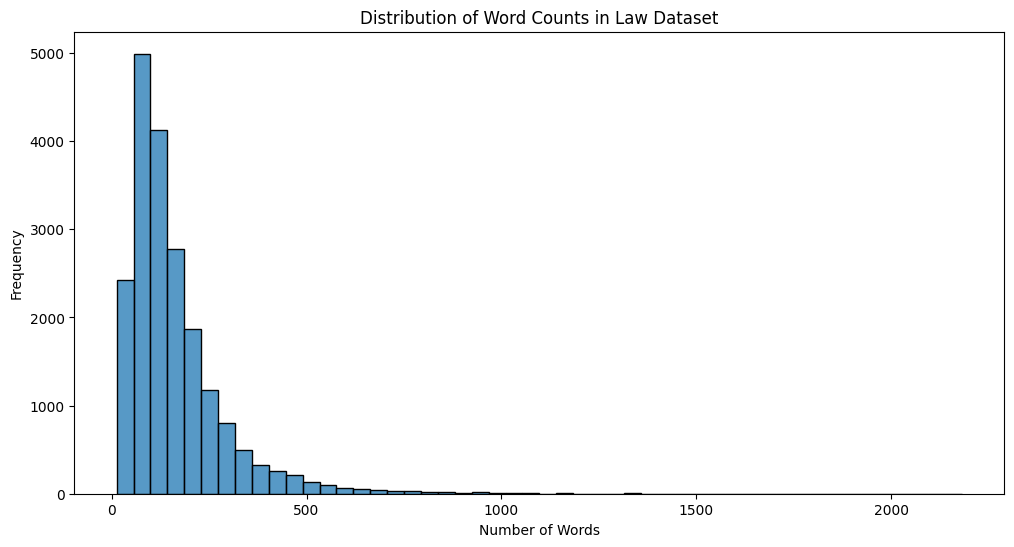

In [11]:
plot_word_count(general_df, 'General')
plot_word_count(healthcare_df, 'Healthcare', text_col='input')
plot_word_count(finance_df, 'Finance')
plot_word_count(law_df, 'Law')

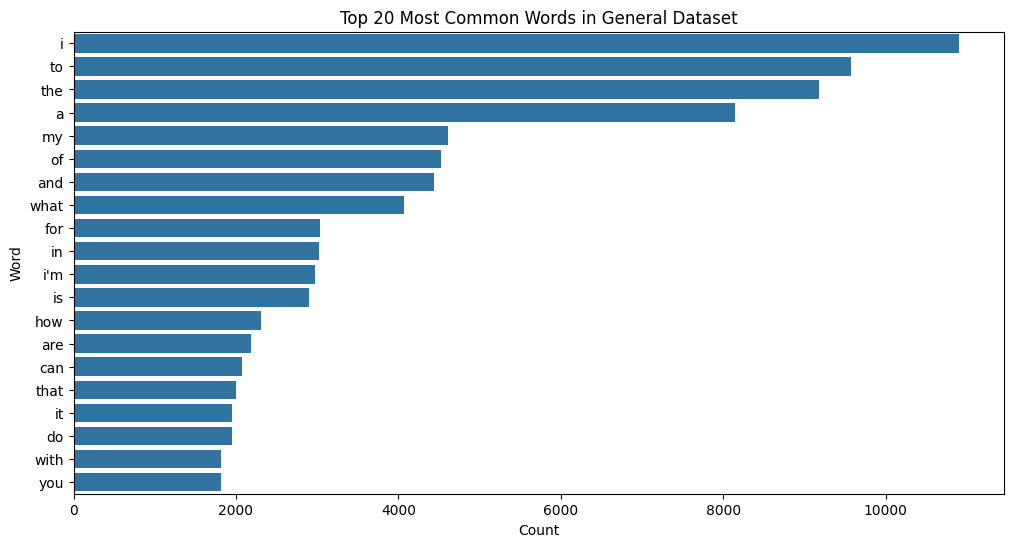

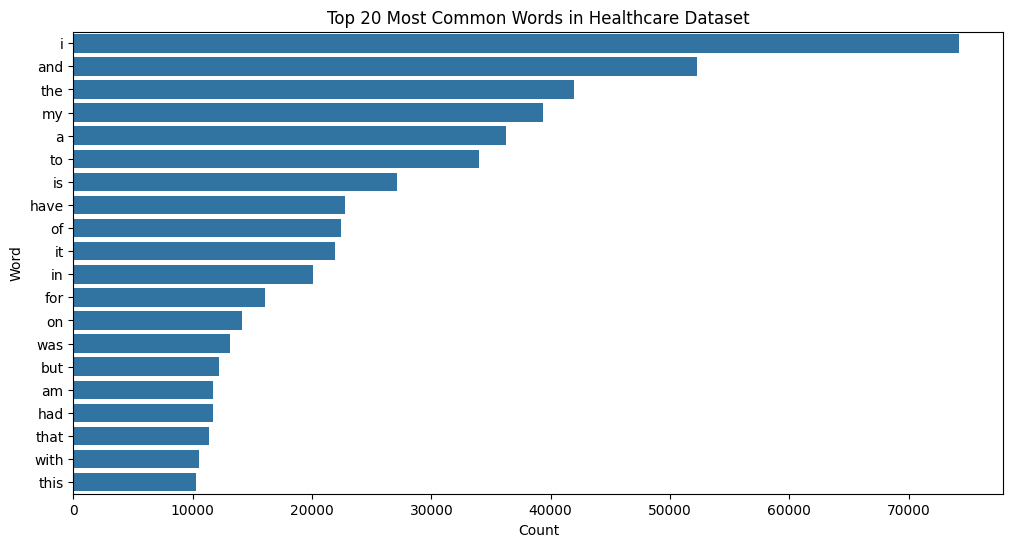

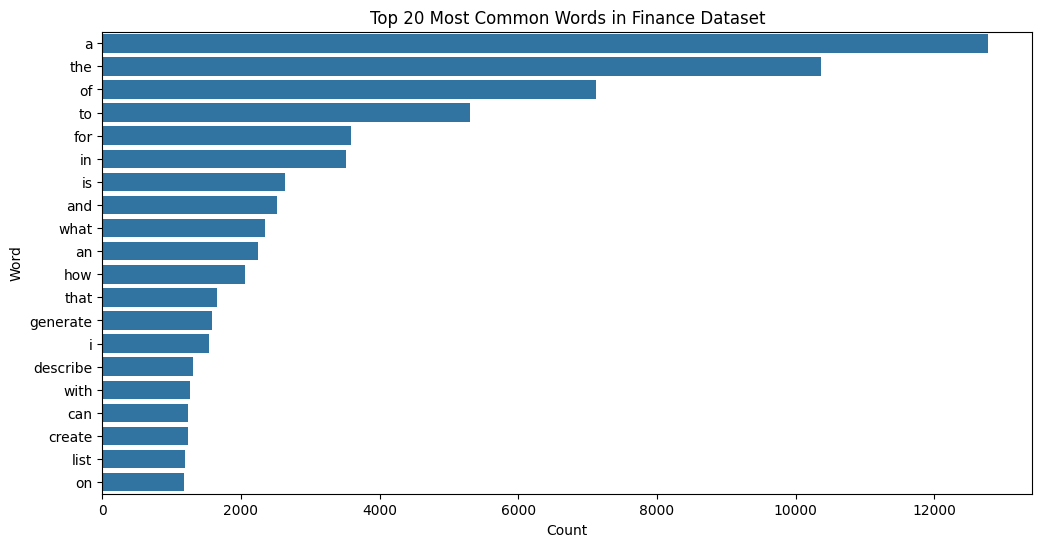

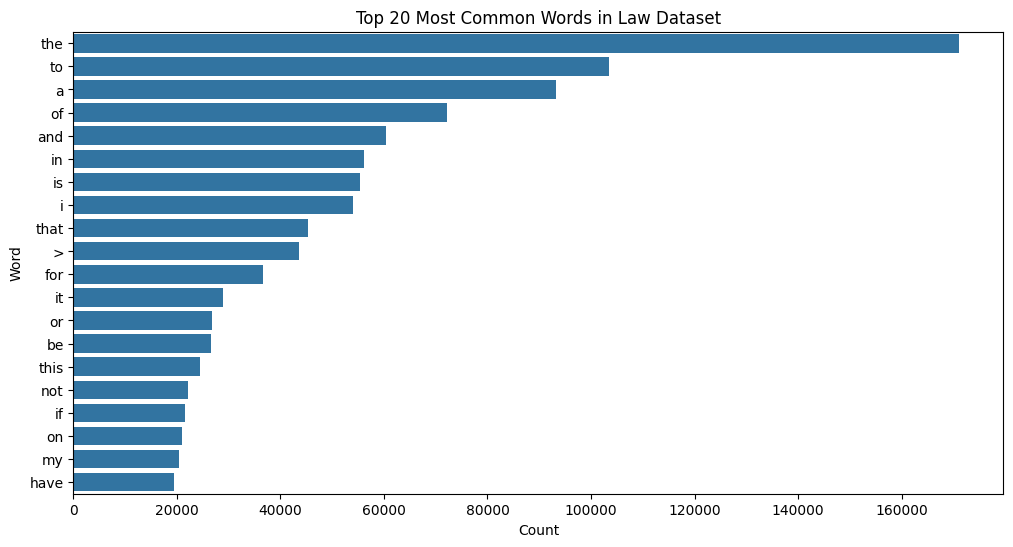

In [12]:
plot_common_words(general_df, 'General')
plot_common_words(healthcare_df, 'Healthcare', text_col='input')
plot_common_words(finance_df, 'Finance')
plot_common_words(law_df, 'Law')